In [94]:
from scipy.cluster.hierarchy import fcluster
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist


file = r"V:\Projects\35 East Wacker\TerraCotta\_Preliminary Models\2021\35 Wacker 2020 N + E_multisheet.xlsx"

df = pd.read_excel(file, sheet_name = "Main")

coords = df[["x", "y"]]

coords = np.array(coords)



In [95]:
from sklearn.cluster import DBSCAN
import numpy as np
X = coords
clustering = DBSCAN(eps=34, min_samples=1).fit(X)

db = DBSCAN(algorithm='auto', 
       eps=3, 
       leaf_size=30, 
       metric='euclidean',
       metric_params=None,
       min_samples=2, 
       n_jobs=None, 
       p=None)


df["db"] = clustering.labels_

size = len(df.groupby("db"))
print(size)
df[["x","y","db"]].head()

950


,x,y,db
0,-1102.651608,1605.786054,0
1,-1059.101815,1608.420844,1
2,-1034.202865,1605.786054,1
3,-1025.370769,1570.906675,2
4,-985.837372,1570.906675,3


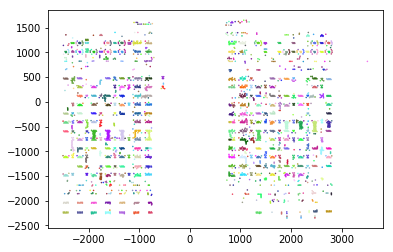

In [115]:
import matplotlib.pyplot as plt
import random

def rand_color(x):
    random.seed(x)
    color = random.randint(0,255), random.randint(0,255), random.randint(0,255)
    color = '#%02x%02x%02x' % color
    return color

df["color"] = df.db.apply(rand_color)
plt.scatter(df.x, df.y, c=df.color, s=.25)
#plt.show()
from matplotlib.pyplot import figure
figure(num=1, figsize=(360, 240), dpi=200, facecolor='w', edgecolor='k')
save = r"C:\Users\mkreidler\Desktop\point_groups.pdf"
plt.savefig(save, bbox_inches='tight')